<a href="https://colab.research.google.com/github/ancestor9/2025_Spring_Capstone-Design/blob/main/Week_12/15_SHAP_(eXAI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SHAP (SHapley Additive exPlanations)**
https://github.com/slundberg/shap  
<img src='https://raw.githubusercontent.com/slundberg/shap/master/docs/artwork/shap_header.svg' width=800>

#### [게임이론](https://clearcode.cc/blog/game-theory-attribution/)

In [1]:
from IPython.core.interactiveshell import InteractiveShell # 모든 명령어 출력
InteractiveShell.ast_node_interactivity = 'all'

import warnings # 파이썬 버전에 따른 오류 출력 방지
warnings.filterwarnings('ignore')

import pandas as pd # pandas
import numpy as np # numphy
import matplotlib.pyplot as plt # 시각화 matplob
import seaborn as sns; sns.set() # 시각화 seaborn

In [2]:
!pip install shap

In [3]:
!pip install xgboost

# 1  회귀생성 모델(Regression)

In [4]:
import xgboost
import shap

# train an XGBoost model
X, y = shap.datasets.california()
X.head()
X.shape
y[0:10]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


(20640, 8)

array([4.526, 3.585, 3.521, 3.413, 3.422, 2.697, 2.992, 2.414, 2.267,
       2.611])

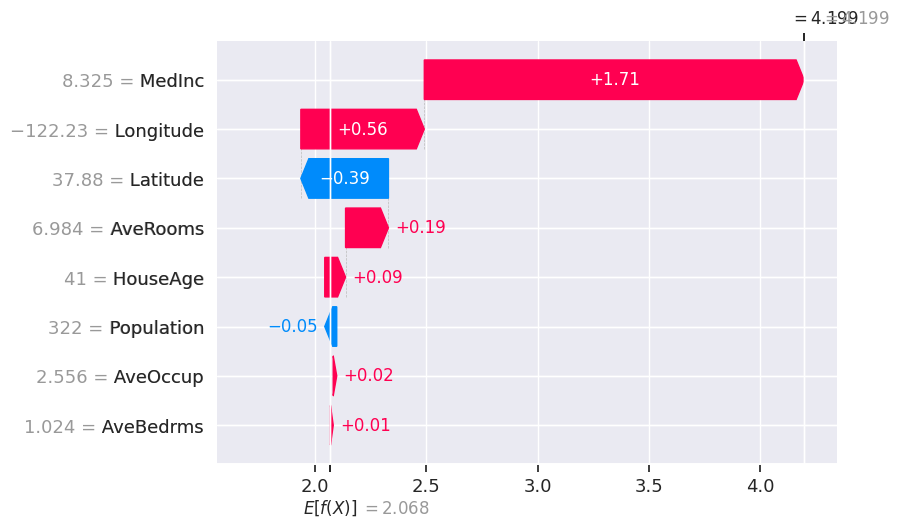


----------------------intermission------------------------------



.values =
array([ 1.426717  ,  0.03108795,  0.00601703, -0.05939217,  0.03235333,
        0.2112088 , -0.36280793,  0.5884698 ], dtype=float32)

.base_values =
np.float32(2.0684865)

.data =
array([ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,  9.71880492e-01,
        2.40100000e+03,  2.10984183e+00,  3.78600000e+01, -1.22220000e+02])

In [5]:
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])
print('\n----------------------intermission------------------------------\n')
shap_values[1]

## 1. 개별 자료의 예측 SHAP Value 시각화
### 1.1 폭포형태(waterfall)
- 입력변수의 색깔 : red는 양의 영향, blue는 음의 방향으로 영향
- 입력변수의 색깔의 길이 : red는 양의 영향 크기, blue는 음의 방향으로 영향 크기
- 첫번째 iinstance의 모델 예측 값 24.019, (f(x))와 모델 예측 평균 22.243, (E[f(X)])

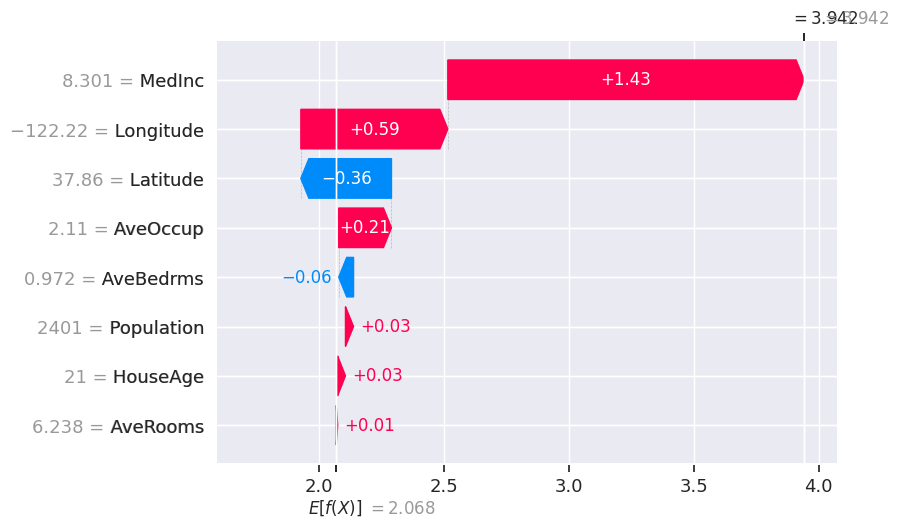

In [6]:
shap.initjs()
shap.plots.waterfall(shap_values[1])

- 모델의 예측 값은 예측값의 평균 + SHAP Values
- $f(x)$ = $E[f(x)]$ + shap_values

In [7]:
print(f'모델 예측 값의 평균, E[f(x)] = {np.mean(model.predict(X))}')
print(f'첫번째 인스턴스의 모델 예측 값 f(x) = {model.predict(X)[0]}')
print(f'첫번째 인스턴스의 SHAP 값 {shap_values[0].values}\n')
print(f'f(x) = {np.sum(shap_values[0].values) + np.mean(model.predict(X))}')
X[:1]

모델 예측 값의 평균, E[f(x)] = 2.068486452102661
첫번째 인스턴스의 모델 예측 값 f(x) = 4.198637962341309
첫번째 인스턴스의 SHAP 값 [ 1.7081785   0.09363674  0.19277047  0.01245449 -0.05390611  0.01571906
 -0.39385185  0.55515116]

f(x) = 4.198638916015625


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23


### 2. 수평선 형태
- deeplearning의 경우 DeepExplainer를 적용하면 가능

#### Use Case
- SHAP provides multiple explainers for different kind of models.
     * TreeExplainer: Support XGBoost, LightGBM, CatBoost and scikit-learn models by Tree SHAP.
     * DeepExplainer (DEEP SHAP): Support TensorFlow and Keras models by using DeepLIFT and Shapley values.
     * GradientExplainer: Support TensorFlow and Keras models.
     * KernelExplainer (Kernel SHAP): Applying to any models by using LIME and Shapley values.

In [8]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.initjs()
shap.plots.force(explainer.expected_value, shap_values[0])

## 2. 전체 자료(특성변수)의 SHAP value 시각화

If we take many force plot explanations such as the one shown above, rotate them 90 degrees, and then stack them horizontally, we can see explanations for an entire dataset (in the notebook this plot is interactive):

Visualize the sub set of dataset

In [9]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:89,:], X.iloc[:89,:])

In [10]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0])
shap_values[0]

array([ 1.7081785 ,  0.09363674,  0.19277047,  0.01245449, -0.05390611,
        0.01571906, -0.39385185,  0.55515116], dtype=float32)

### 모든 데이터(features, targets)의 SHAP value

In [11]:
shap_values
print(f'\n\n원자료의 크기{X.shape}와 SHAP value의 크기{shap_values.shape}')

array([[ 1.7081785 ,  0.09363674,  0.19277047, ...,  0.01571906,
        -0.39385185,  0.55515116],
       [ 1.426717  ,  0.03108795,  0.00601703, ...,  0.2112088 ,
        -0.36280793,  0.5884698 ],
       [ 1.3600677 ,  0.16082455,  0.47361216, ..., -0.02257477,
        -0.5582292 ,  0.5463798 ],
       ...,
       [-0.5842778 ,  0.01744973, -0.0949486 , ...,  0.10111337,
        -0.9798146 ,  0.3479332 ],
       [-0.6035651 ,  0.03118367, -0.05752674, ...,  0.23118298,
        -1.051862  ,  0.32962263],
       [-0.44976887,  0.02051439, -0.12479055, ..., -0.00343278,
        -0.85543966,  0.33553985]], dtype=float32)



원자료의 크기(20640, 8)와 SHAP value의 크기(20640, 8)


## 모델 예측 값과 SHAP value
**게임이론의 features = players, model = pay off**

- 특성 변수((players)의 SHAP value를 모두 합한 값은 data['sum of SHAP'] -(1)
- 예측 모델의 평균 예측 값은 data['average mean of model prediction']  -(2)
- 각 인스턴스별 (1)과 (2)를 총합한 값(data['prediction value by shap'])은
- 예측 값(data['prediction by model'])이다.

In [12]:
data = pd.DataFrame(shap_values, columns = X.columns)
data['sum of SHAP'] = data.sum(1)  # 특성 변수의 SHAP values
data['average mean of model prediction'] = np.mean(model.predict(X))
data['prediction value by shap'] = data['sum of SHAP'] + data['average mean of model prediction']
data['prediction by model'] = model.predict(X)
data.iloc[:, 8:]

,sum of SHAP,average mean of model prediction,prediction value by shap,prediction by model
0,2.130152,2.068486,4.198639,4.198638
1,1.873654,2.068486,3.942140,3.942140
2,1.972146,2.068486,4.040633,4.040633
3,1.106700,2.068486,3.175187,3.175187
4,0.358360,2.068486,2.426846,2.426847
...,...,...,...,...
20635,-1.319618,2.068486,0.748869,0.748868
20636,-1.275149,2.068486,0.793337,0.793338
20637,-1.225043,2.068486,0.843443,0.843443
20638,-1.121255,2.068486,0.947231,0.947231


### SHAP summary plot 해석하기

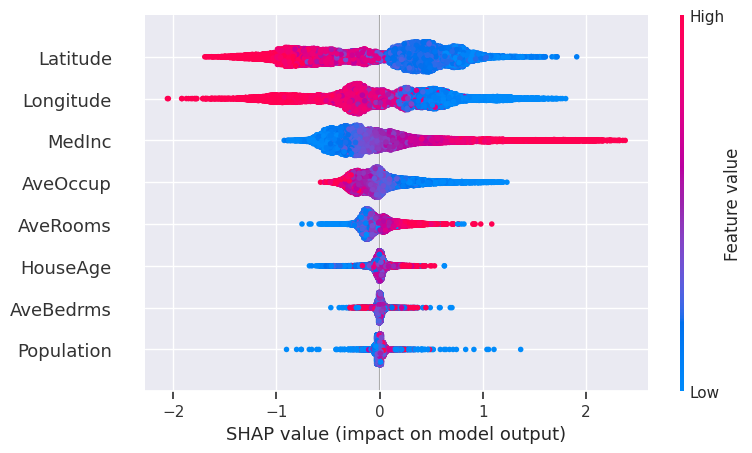

In [13]:
shap.summary_plot(shap_values, X)

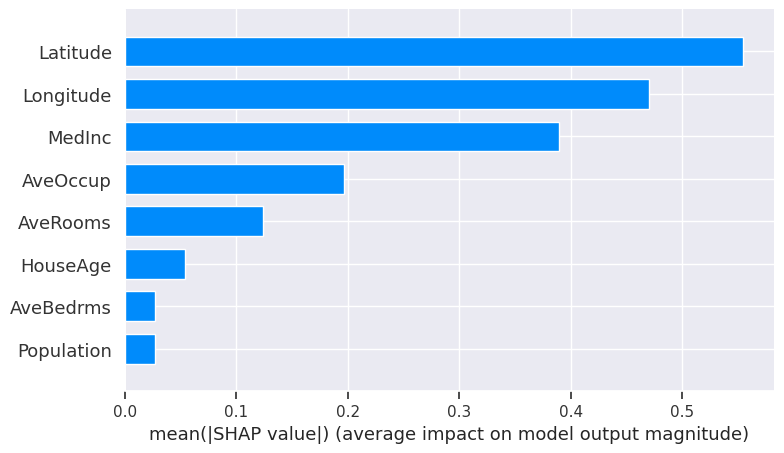

In [14]:
shap.summary_plot(shap_values, X, plot_type="bar")

# End